# 谷歌职业技能数据分析

## 1. 项目介绍

对于公司管理者而言，工作中最重要的事情是招聘人才。谷歌作为全球最大的搜索引擎公司，更是如此。对于普通应聘者都很好奇谷歌需要何种编程语言的技能或技术。该项目通过分析爬取到的谷歌招聘数据集来回答这个问题。

## 2. 相关知识点
* 数据读取
* 数据过滤
* Pandas的apply函数
* 利用正则表达式处理字符串
* 词云分析

## 3. 思路讲解
1. 认识数据
2. 处理数据
3. 分析数据
4. 结果呈现

## 4. 代码实现

### 4.1 认识数据
* 提供的数据集为job_skills.csv，包含了招聘广告的相关属性
* 数据字典（主要列名解释）：
    * Company: 公司名称
    * Title: 职位名称
    * Category: 职位类别
    * Location: 工作地点
    * Responsibilities: 相关职责
    * Minimum Qualifications: 最低条件
    * Preferred Qualifications: 优先考虑的条件

In [3]:
import os
import pandas as pd

# 声明数据集路径
data_path = '../input/'
skills_datafile = os.path.join(data_path, 'job_skills.csv')

# 读取数据
skills_df = pd.read_csv(skills_datafile)

预览数据

In [4]:
print('该数据集共有{}行，{}列'.format(skills_df.shape[0], skills_df.shape[1]))

该数据集共有1250行，7列


In [5]:
skills_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [6]:
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
Company                     1250 non-null object
Title                       1250 non-null object
Category                    1250 non-null object
Location                    1250 non-null object
Responsibilities            1235 non-null object
Minimum Qualifications      1236 non-null object
Preferred Qualifications    1236 non-null object
dtypes: object(7)
memory usage: 68.4+ KB


In [7]:
skills_df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver..."
freq,1227,35,168,190,33,32,32


### 4.2 处理数据

#### 4.2.1 清除空记录

In [8]:
 # 判断是否有空记录
skills_df.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [9]:
# 删除空记录
skills_df.dropna(inplace=True)

#### 4.2.2 数据过滤

In [10]:
# 只保留公司是"google"的记录
skills_df = skills_df[skills_df['Company'] == 'Google'].copy()

#### 4.2.3 处理Location列
Location列包含了国家和城市，并用逗号隔开。所以可以通过按逗号分割字符串获取国家

In [11]:
skills_df['Country'] = skills_df['Location'].apply(lambda x : x.split(',')[-1])
skills_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",United States
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,United States


In [12]:
skills_df['Country'].value_counts()[:10]

 United States     607
 Ireland            87
 United Kingdom     61
 Germany            53
Singapore           39
 China              38
 Australia          35
 Japan              31
 Taiwan             30
 India              27
Name: Country, dtype: int64

#### 4.2.4 获取职位描述中需要工作经验的年限

In [13]:
import re

# 使用正则表达式获取有年限描述中的信息
# re.findall：返回string中所有与pattern相匹配的全部字符串，返回形式为数组
skills_df['Minimum_years_experience'] = skills_df['Minimum Qualifications'].apply(lambda x : re.findall('([0-9]+) year', x))

skills_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,[3]
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,[7]
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States,"[2, 1, 1]"
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",United States,[]
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,United States,[4]


In [14]:
# 填充空字符串为[0]
skills_df['Minimum_years_experience'] = skills_df['Minimum_years_experience'].apply(lambda x : [0] if len(x) == 0 else x)
skills_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,[3]
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,[7]
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States,"[2, 1, 1]"
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",United States,[0]
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,United States,[4]


In [15]:
# 将列表中最大的年限最为输出值
skills_df['Minimum_years_experience'] = skills_df['Minimum_years_experience'].apply(lambda x : max(x))
skills_df['Minimum_years_experience'] = skills_df.Minimum_years_experience.astype(int)
skills_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States,2
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",United States,0
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,United States,4


In [16]:
skills_df['Minimum_years_experience'].describe()

count    1212.000000
mean        2.842409
std         3.301640
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        15.000000
Name: Minimum_years_experience, dtype: float64

### 4.3 分析数据

#### 4.3.1 分析招聘信息中的学历分布

In [17]:
degree_list = ['BA', 'BS', 'Bachelor', 'MBA', 'Master', 'PhD']

degree_dict = dict((x, 0) for x in degree_list)
for degree in degree_list:
    degree_count = skills_df['Minimum Qualifications'].str.contains(degree).sum()
    # 只统计degree_list中的degree信息
    if degree in degree_list:
        degree_dict[degree] = degree_count
        
print(degree_dict)

{'BA': 890, 'BS': 860, 'Bachelor': 163, 'MBA': 71, 'Master': 80, 'PhD': 8}


In [18]:
# 对学位按数量排序
degree_requirement = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)
# 构建dataframe
degree_df = pd.DataFrame(degree_requirement, columns=['Degree', 'Count'])
degree_df['Count'] = degree_df['Count'].astype('float')
degree_df

,Degree,Count
0,BA,890.0
1,BS,860.0
2,Bachelor,163.0
3,Master,80.0
4,MBA,71.0
5,PhD,8.0


Text(0.5,0.98,'Degrees Distribution')

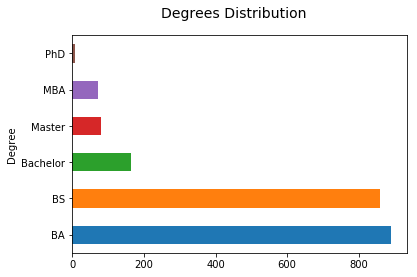

In [19]:
# 可视化结果
import matplotlib.pyplot as plt
%matplotlib inline

degree_df.plot.barh(x='Degree', y='Count', legend=False)
plt.suptitle('Degrees Distribution', fontsize=14)

#### 4.3.2 工作经验年限分布

Text(0.5,0.98,'Minimum work experience')

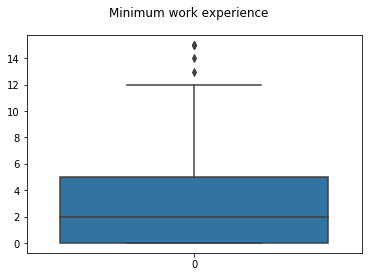

In [20]:
import seaborn as sns

sns.boxplot(data=skills_df['Minimum_years_experience'])
plt.suptitle('Minimum work experience')

Text(0.5,0.98,'Minimum work experience')

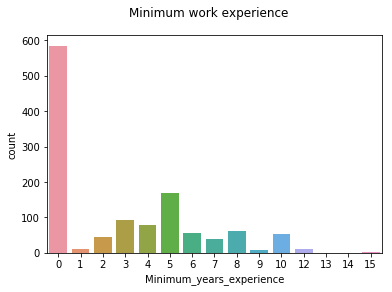

In [21]:
sns.countplot(data=skills_df, x='Minimum_years_experience')
plt.suptitle('Minimum work experience')

#### 4.3.3  编程语言要求

In [22]:
language_list = ['Python', 'Java ', 'C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL', 'Go ']

language_dict = dict((language, 0) for language in language_list)

for language in language_list:
    count = skills_df['Minimum Qualifications'].str.contains(language).sum()
    if language in language_list:
        language_dict[language] = count
        
print(language_dict)

{'Python': 96, 'Java ': 10, 'C#': 15, 'PHP': 7, 'Javascript': 3, 'Ruby': 14, 'Perl': 6, 'SQL': 69, 'Go ': 7}


In [23]:
languages_requirement = sorted(language_dict.items(), key=lambda item: item[1], reverse=True)
language_df = pd.DataFrame(languages_requirement, columns=['Language', 'Count'])
language_df['Count'] = language_df['Count'].astype('float')
language_df

,Language,Count
0,Python,96.0
1,SQL,69.0
2,C#,15.0
3,Ruby,14.0
4,Java,10.0
5,PHP,7.0
6,Go,7.0
7,Perl,6.0
8,Javascript,3.0


Text(0.5,0.98,'Languages Distribution')

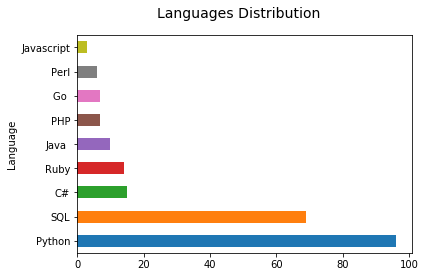

In [24]:
# 可视化结果
language_df.plot.barh(x='Language', y='Count', legend=False)
plt.suptitle('Languages Distribution', fontsize=14)

#### 4.3.4 词频统计

* 利用“词云”统计词频
* 安装：conda install -c conda-forge wordcloud 或者 pip install wordcloud

In [25]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

def generate_word_cloud(df, title, text):
    """
        生成词云
    """
    df_subset = df.loc[df['Title'].str.contains(title).fillna(False)]
    long_text = ' '.join(df_subset[text].tolist())
    wordcloud = WordCloud().generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(text, size=24)
    plt.show()

* 分析师关键词分析

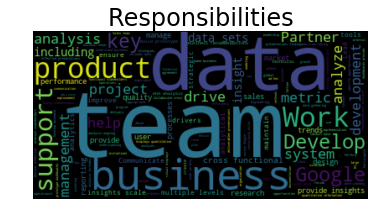

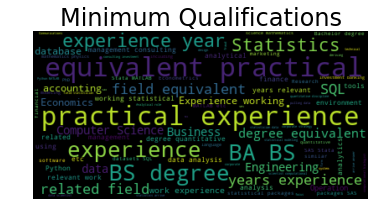

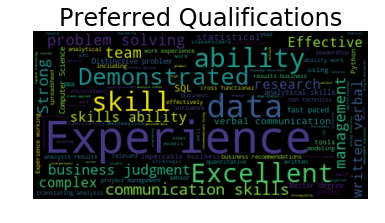

In [26]:
generate_word_cloud(skills_df, 'Analyst', 'Responsibilities')
generate_word_cloud(skills_df, 'Analyst', 'Minimum Qualifications')
generate_word_cloud(skills_df, 'Analyst', 'Preferred Qualifications')

* 开发者关键词分析

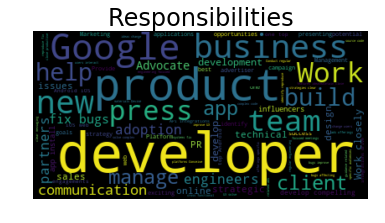

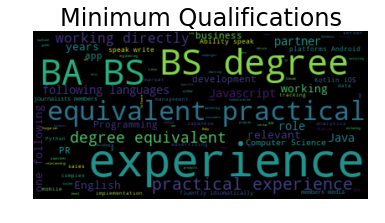

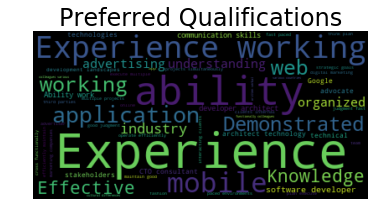

In [27]:
generate_word_cloud(skills_df, 'Developer', 'Responsibilities')
generate_word_cloud(skills_df, 'Developer', 'Minimum Qualifications')
generate_word_cloud(skills_df, 'Developer', 'Preferred Qualifications')

* 销售关键词分析

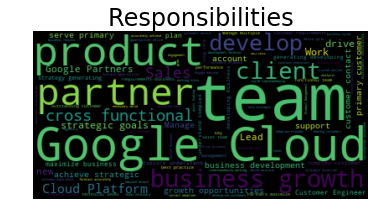

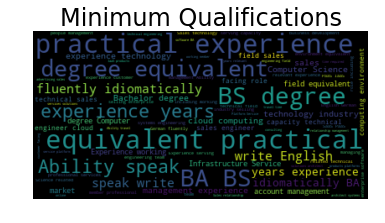

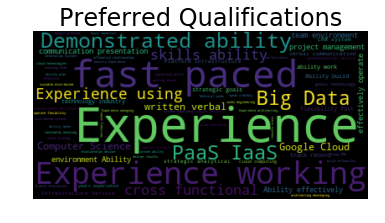

In [28]:
generate_word_cloud(skills_df, 'Sales', 'Responsibilities')
generate_word_cloud(skills_df, 'Sales', 'Minimum Qualifications')
generate_word_cloud(skills_df, 'Sales', 'Preferred Qualifications')

## 5. 项目总结
该项目涵盖了Python常用的数据分析工具包括：Pandas, Seaborn, WordCloud；并通过数据处理、词云分析等分析方法及可视化方法完成了谷歌职业技能数据分析。
课后，学员可以模仿随堂代码及参考资料，在提供的数据集上进行更深层次的分析。

## 6. 参考
* [词云分析](https://amueller.github.io/word_cloud/index.html)
* [Pandas的apply函数](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)
* [Python正则表达式](https://docs.python.org/3/library/re.html)
* [Python自定义排序](https://www.saltycrane.com/blog/2007/09/how-to-sort-python-dictionary-by-keys/)